# EDA

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src import settings

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (9, 3)

In [2]:
df = pd.read_csv(os.path.join(settings.PROJECT_ROOT, settings.AUCTION_SUMMARY_FILE))

In [3]:
df.head()

,x,bid,auctions,wins
0,0.585202,2.719391,7,7
1,4.567498,2.688336,2,2
2,1.481628,0.200173,4,0
3,0.828790,0.187734,4,0
4,1.988679,5.792509,7,7


## Number of winning bids

In [4]:
df = df.assign(winning_bid=lambda x: x.bid >= x.auctions)
df.winning_bid.value_counts()

winning_bid
False    457
True      48
Name: count, dtype: int64

In [5]:
df.query("not winning_bid")

,x,bid,auctions,wins,winning_bid
0,0.585202,2.719391,7,7,False
2,1.481628,0.200173,4,0,False
3,0.828790,0.187734,4,0,False
4,1.988679,5.792509,7,7,False
5,0.497997,0.596372,5,1,False
...,...,...,...,...,...
500,4.242795,4.493238,6,6,False
501,0.314910,0.239462,6,0,False
502,0.486758,0.304939,3,0,False
503,0.071858,1.060062,10,10,False


In [6]:
df.query("winning_bid")

,x,bid,auctions,wins,winning_bid
1,4.567498,2.688336,2,2,True
31,4.139151,3.439598,3,3,True
54,5.617817,1.145707,1,0,True
92,2.533011,2.919253,2,2,True
97,2.288818,4.995452,4,4,True
100,4.925009,4.053294,2,2,True
101,4.899944,3.485523,3,3,True
104,5.900615,5.621448,5,5,True
107,5.357770,1.457140,1,0,True
108,2.085346,4.259880,3,3,True


## Probability of winning the auction with a certain bid price

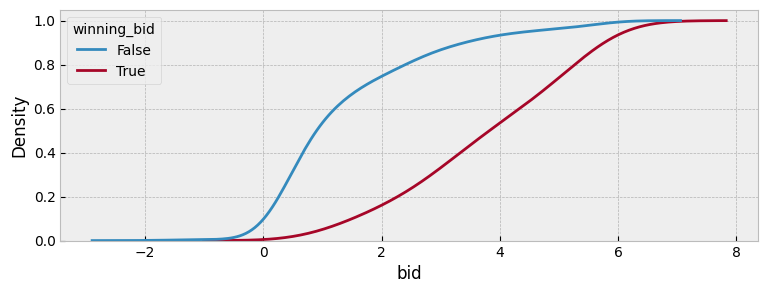

In [7]:
sns.kdeplot(df, x="bid", hue="winning_bid", common_norm=False, cumulative=True);

In [8]:
df = df.assign(qx=lambda df: pd.cut(df.x, 10, precision=1))

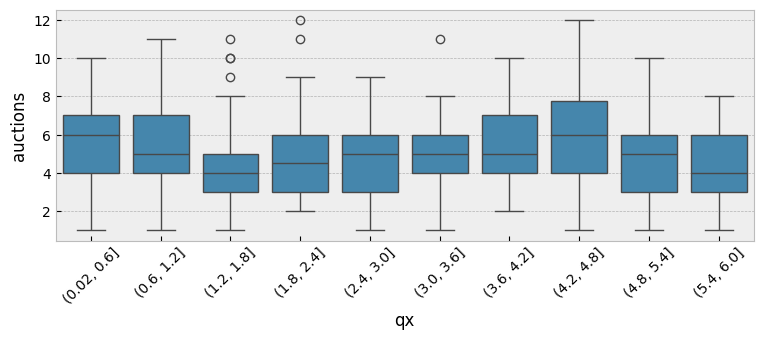

In [9]:
sns.boxplot(df, x="qx", y="auctions")
plt.xticks(rotation=45);

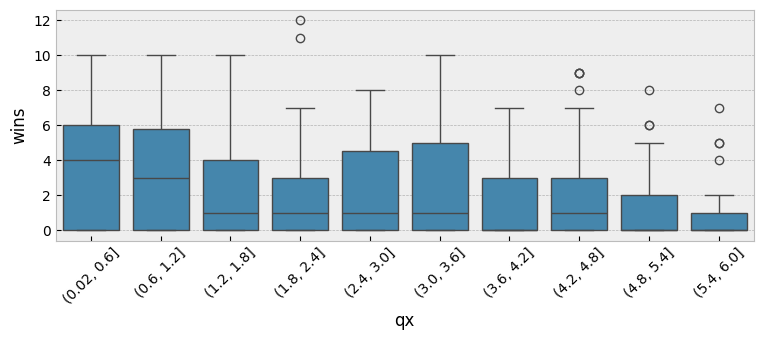

In [10]:
sns.boxplot(df, x="qx", y="wins")
plt.xticks(rotation=45);

In [20]:
df.query("winning_bid").assign(shortfall=lambda x: x.auctions - x.wins).shortfall.value_counts()

shortfall
 0    37
 1     8
 2     2
-1     1
Name: count, dtype: int64

In [21]:
df.query("not winning_bid").assign(shortfall=lambda x: x.auctions - x.wins).shortfall.value_counts()

shortfall
 0     118
 5      54
 4      53
 3      52
 2      42
 1      42
 6      32
 7      26
 8      16
 9      11
 10      6
 11      2
-1       1
-3       1
 12      1
Name: count, dtype: int64

In [21]:
df.auctions.value_counts()

auctions
4     86
5     86
6     79
3     69
7     59
2     41
8     28
9     21
1     18
10    10
11     5
12     3
Name: count, dtype: int64

In [20]:
df.wins.value_counts()

wins
0     243
1      43
3      42
5      36
4      33
2      29
6      29
7      28
8      10
9       6
10      4
12      1
11      1
Name: count, dtype: int64